In [1]:
MAKE_BOOK_FIGURES=Trueimport numpy as npimport scipy.stats as stimport matplotlib as mplimport matplotlib.pyplot as plt%matplotlib inlineimport matplotlib_inlinematplotlib_inline.backend_inline.set_matplotlib_formats('svg')import seaborn as snssns.set_context("paper")sns.set_style("ticks")def set_book_style():    plt.style.use('seaborn-v0_8-white')     sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings        'font.family': 'serif',  # For academic publishing        'font.size': 8,  # As requested, 10pt font        'axes.labelsize': 8,        'axes.titlesize': 8,        'xtick.labelsize': 7,  # Slightly smaller for better readability        'ytick.labelsize': 7,        'legend.fontsize': 7,                # Line and marker settings for consistency        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout to prevent clipped labels        'figure.constrained_layout.use': True,                # Default DPI (will override when saving)        'figure.dpi': 600,        'savefig.dpi': 600,                # Despine - remove top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional trim settings        'figure.autolayout': True,  # Alternative to constrained_layout        'savefig.bbox': 'tight',    # Trim when saving        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off    })def set_notebook_style():    plt.style.use('seaborn-v0_8-white')    sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings - using default sizes        'font.family': 'serif',        'axes.labelsize': 10,        'axes.titlesize': 10,        'xtick.labelsize': 9,        'ytick.labelsize': 9,        'legend.fontsize': 9,                # Line and marker settings        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout settings        'figure.constrained_layout.use': True,                # Remove only top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional settings        'figure.autolayout': True,        'savefig.bbox': 'tight',        'savefig.pad_inches': 0.1    })def save_for_book(fig, filename, is_vector=True, **kwargs):    """    Save a figure with book-optimized settings.        Parameters:    -----------    fig : matplotlib figure        The figure to save    filename : str        Filename without extension    is_vector : bool        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.    **kwargs : dict        Additional kwargs to pass to savefig    """        # Set appropriate DPI and format based on figure type    if is_vector:        dpi = 1000        ext = '.pdf'    else:        dpi = 600        ext = '.tif'        # Save the figure with book settings    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)def make_full_width_fig():    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)def make_half_width_fig():    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)if MAKE_BOOK_FIGURES:    set_book_style()else:    set_notebook_style()make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(continous-random-variables)=
# Continuous Random Variables

Consider a random variable $X$ that can take values in $\mathbb{R}$.
We say that $X$ is a continuous random variable if the range of $X$ is uncountable, e.g., if it forms an interval.
For example, $X$ can be the mass of a ball bearing, a room's temperature, or a gas's pressure.
In what follows, we introduce the concepts of cumulative distribution function, probability density function, and expectation for continuous random variables.

(CDF)=
## The cumulative distribution function

The **cumulative distribution function** (CDF) of a continuous random variable $X$ is defined as:

$$
F_X(x) := p(X\le x) = p\left(\left\{\omega: X(\omega) \le x\right\}\right).
$$

In words, it is the probability that $X$ is less than or equal to $x$.

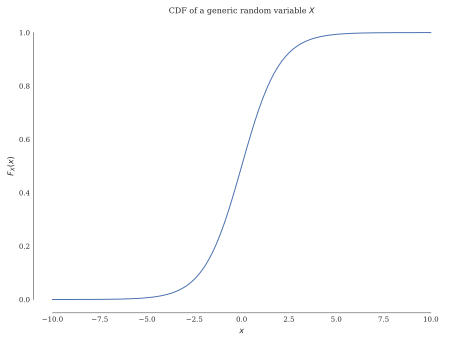

In [2]:
# Plot a sigmoid function
import numpy as np
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$F_X(x)$')
sns.despine(trim=True)
plt.title("CDF of a generic random variable $X$");

The CDF has the following properties:

+ $F_X(x)$ is an increasing function. Intuitively, this is because the more $x$ increases, the more likely it is that $X$ is less than or equal to $x$.

+ $F_X(-\infty) = 0$. Intuitively, this is because $X$ cannot be less than $-\infty$.

+ $F_X(+\infty) = 1$. Intuitively, this is because $X$ is always less than or equal to $+\infty$.

+ $p(a\le X \le b) = F_X(b) - F_X(a)$.

```{admonition} Proof
:class: dropdown
Let $a < b$. Then:

$$
\begin{align}
p(a \le X \le b) &= p(a \le X\; \text{and}\; X \le b)\\
&= p(X \ge a\;\text{and}\;X \le b)\\
&= 1 - p(\text{not}\;(X \ge a\;\text{and}\;X \le b))\\
&= 1 - p(X < a\;\text{or}\;X > b)\\
&= 1 - p(X < a) - p(X > b)\\
&= 1 - F_X(a) - (1 - p(X \le b))\\
&= - F_X(a) + F_X(b).
\end{align}
$$

```

```{note}
If there is no ambiguity, we will write $F(x)$ instead of $F_X(x)$.
```

(pdf=)
## The probability density function

The **probability density function** (PDF) is a "function" $f_X(x)$ that can give us the probability that $X$ is in any "good" subset $A$ of $\mathbb{R}$ as follows:

$$
p(X\in A) = \int_A f_X(x) dx.
$$

```{admonition} Again, it is not that simple
:class: dropdown
First, "good" subsets are the so-called Borel sets of $\mathbb{R}$.
One can obtain Borel sets by starting with the open intervals of $\mathbb{R}$ and applying the operations of countable union, countable intersection, and complement.
It is hard to make sets that are not Borel sets.
You learn about this in a measure theory course.

Second, not all random variables have a PDF that is a function in the usual sense.
However, if you allow the PDF to include [Dirac's $\delta$](https://en.wikipedia.org/wiki/Dirac_delta_function), 
any random variable, including discrete random variables, has a PDF.
For example, if $X$ is a random variable that takes the value $1$ with probability $1/2$ and the value $2$ with probability $1/2$, then the PDF of $X$ is:

$$
f_X(x) = \frac{1}{2}\delta(x-1) + \frac{1}{2}\delta(x-2),
$$

where $\delta(x)$ is Dirac's delta function.
```

```{note}
If there is no ambiguity, we will write $p(x)$ instead of $f_X(x)$.
Here, when you see $p(x)$, you should understand that a random variable $X$ is implicit and that $p(x)$ is the PDF of $X$ evaluated at $x$.
As with the PMF, this is a common abuse of notation, especially in machine learning research papers.
Again, you cannot write $p(0.5)$ because you need to know what random variable you are referring to.
But you can write $p(x=0.5)$ to remove the ambiguity.
```

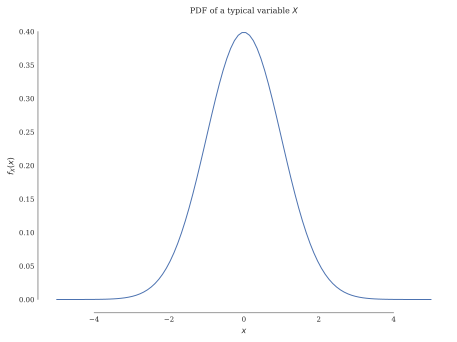

In [3]:
# Plot the pdf of a normal random variable
from scipy.stats import norm
x = np.linspace(-5, 5, 100)
y = norm.pdf(x)
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$f_X(x)$')
sns.despine(trim=True)
plt.title("PDF of a typical variable $X$");

The PDF has the following properties:

+ $p(x) \ge 0$ for all $x$. This equation holds because probabilities are non-negative.

+ $\int_{-\infty}^{\infty} p(x) dx = 1$. It holds because the probability that $X$ takes any value is one.

+ The derivative of the CDF is the PDF, i.e., $F_X'(x) = p(x)$. It is a consequence of the fundamental theorem of calculus.

```{admonition} Proof}
:class: dropdown

Let us write $f_X(x)$ instead of $p(x)$ to avoid ambiguity.
Then, we have:

$$
F(x) = p(X \le x) = \int_{-\infty}^x f_X(t) dt.
$$

Differentiating both sides with respect to $x$, we get the result.
```

```{note}
The PDF is not a probability but a probability density.
It can be greater than one.
It is the area under the PDF that is a probability.
And that area is one.
```

## Expectations of continuous random variables

The expectation of a continuous random variable is:

$$
\mathbb{E}[X] = \int_{-\infty}^\infty x p(x)dx.
$$

Geometrically, the expected value of $X$ is the x coordinate of the centroid of the area under the curve $p(x)$.
You can think of it as the value you "expect" to take.

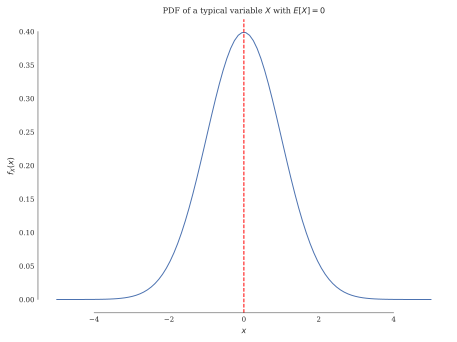

In [4]:
# Plot the pdf of a normal random variable and mark the expected value
from scipy.stats import norm
x = np.linspace(-5, 5, 100)
y = norm.pdf(x)
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$f_X(x)$')
plt.axvline(x=0, color='r', linestyle='--')
sns.despine(trim=True)
plt.title("PDF of a typical variable $X$ with $E[X]=0$");

But remember that the expected value may not be a value that $X$ can take.
Here is an example.

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
/var/folders/3n/r5vj11ss7lzcdl10vfhb_mw00000gs/T/ipykernel_68920/3227439545.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(x=0, color='r', linestyle='--', label='$\mathbb{E}[X]$')


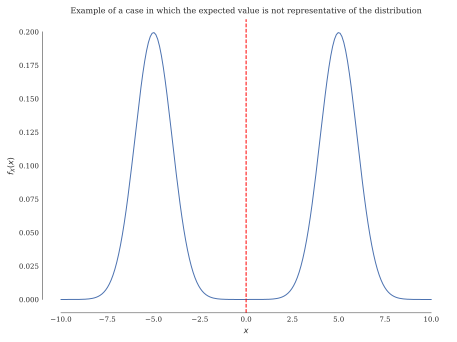

In [5]:
# Plot the pdf of a mixture of two normal random variables with different means but the same variance
from scipy.stats import norm
x = np.linspace(-10, 10, 200)
y = 0.5 * norm.pdf(x, loc=-5) + 0.5 * norm.pdf(x, loc=5)
plt.plot(x, y)
# Add the expected value
plt.axvline(x=0, color='r', linestyle='--', label='$\mathbb{E}[X]$')
plt.xlabel('$x$')
plt.ylabel('$f_X(x)$')
sns.despine(trim=True)
plt.title("Example of a case in which the expected value is not representative of the distribution");

Another useful formula is:

$$
\mathbb{E}[f(X)] = \int_{-\infty}^\infty f(x)p(x)dx.
$$

It gives you the expected value of $f(X)$, where $f$ is any function.

```{note}
The expected value of a continuous random variable has the same properties as the expected value of a discrete random variable, see [this](properties-expectation).
The proofs are similar.
You just change the sums to integrals.
```



## Variance of continuous random variables

The variance of a continuous random variable is:

$$
\mathbb{V}[X] = \mathbb{E}\left[\left(X-\mathbb{E}[X]\right)^2\right] = \int_{-\infty}^\infty (x-\mathbb{E}[X])^2 p(x)dx.
$$

You can think of it as the average squared distance of $X$ from its expected value.
It tells you how spread out $X$ is.

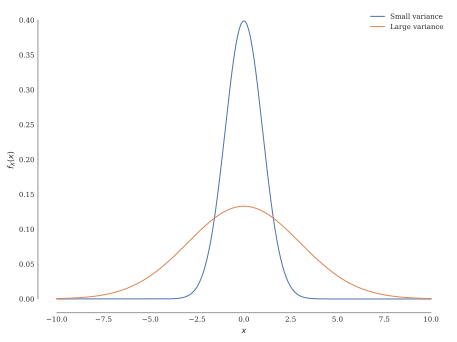

In [6]:
# Plot two random variables with the same expected value but different variances
# Mark them as small and large variance using text labels
from scipy.stats import norm
x = np.linspace(-10, 10, 200)
y = norm.pdf(x, loc=0, scale=1)
plt.plot(x, y, label='Small variance')
y = norm.pdf(x, loc=0, scale=3)
plt.plot(x, y, label='Large variance')
# Add the expected value
plt.xlabel('$x$')
plt.ylabel('$f_X(x)$')
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

The variance has units of $X$ squared.
To get a measure of the spread that has the same units as $X$, we take the square root of the variance.
It is called the standard deviation of $X$ and it is denoted by $\sigma_X$.

$$
\sigma_X = \sqrt{\mathbb{V}[X]}.
$$

Finally, note that the variance of a continuous random variable has the same properties as the variance of a discrete random variable, see [this](properties-variance).